In [123]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt

In [124]:
dados = pd.read_csv('dados/dataset.csv')

In [125]:
dados.head()

,ID_Pedido,Data_Pedido,ID_Cliente,Segmento,Pais,Cidade,Estado,ID_Produto,Categoria,SubCategoria,Valor_Venda
0,CA-2017-152156,08/11/2017,CG-12520,Consumer,United States,Henderson,Kentucky,FUR-BO-10001798,Furniture,Bookcases,261.9600
1,CA-2017-152156,08/11/2017,CG-12520,Consumer,United States,Henderson,Kentucky,FUR-CH-10000454,Furniture,Chairs,731.9400
2,CA-2017-138688,12/06/2017,DV-13045,Corporate,United States,Los Angeles,California,OFF-LA-10000240,Office Supplies,Labels,14.6200
3,US-2016-108966,11/10/2016,SO-20335,Consumer,United States,Fort Lauderdale,Florida,FUR-TA-10000577,Furniture,Tables,957.5775
4,US-2016-108966,11/10/2016,SO-20335,Consumer,United States,Fort Lauderdale,Florida,OFF-ST-10000760,Office Supplies,Storage,22.3680


In [126]:
dados['Data_Pedido'] = pd.to_datetime(dados['Data_Pedido'], format='%d/%m/%Y')

In [127]:
dados.shape

(9700, 11)

In [128]:
dados.columns

Index(['ID_Pedido', 'Data_Pedido', 'ID_Cliente', 'Segmento', 'Pais', 'Cidade',
       'Estado', 'ID_Produto', 'Categoria', 'SubCategoria', 'Valor_Venda'],
      dtype='object')

In [129]:
dados.dtypes

ID_Pedido               object
Data_Pedido     datetime64[ns]
ID_Cliente              object
Segmento                object
Pais                    object
Cidade                  object
Estado                  object
ID_Produto              object
Categoria               object
SubCategoria            object
Valor_Venda            float64
dtype: object

In [130]:
dados.describe()

,Data_Pedido,Valor_Venda
count,9700,9700.000000
mean,2017-05-02 00:59:49.608247552,230.469892
min,2015-01-03 00:00:00,0.444000
25%,2016-05-26 00:00:00,17.248000
50%,2017-06-26 00:00:00,54.272000
75%,2018-05-18 00:00:00,209.932500
max,2018-12-30 00:00:00,22638.480000
std,NaN,627.504252


In [131]:
dados[dados.duplicated()]

,ID_Pedido,Data_Pedido,ID_Cliente,Segmento,Pais,Cidade,Estado,ID_Produto,Categoria,SubCategoria,Valor_Venda


In [132]:
dados.isnull().sum()

ID_Pedido       0
Data_Pedido     0
ID_Cliente      0
Segmento        0
Pais            0
Cidade          0
Estado          0
ID_Produto      0
Categoria       0
SubCategoria    0
Valor_Venda     0
dtype: int64

In [133]:
dados.head()

,ID_Pedido,Data_Pedido,ID_Cliente,Segmento,Pais,Cidade,Estado,ID_Produto,Categoria,SubCategoria,Valor_Venda
0,CA-2017-152156,2017-11-08,CG-12520,Consumer,United States,Henderson,Kentucky,FUR-BO-10001798,Furniture,Bookcases,261.9600
1,CA-2017-152156,2017-11-08,CG-12520,Consumer,United States,Henderson,Kentucky,FUR-CH-10000454,Furniture,Chairs,731.9400
2,CA-2017-138688,2017-06-12,DV-13045,Corporate,United States,Los Angeles,California,OFF-LA-10000240,Office Supplies,Labels,14.6200
3,US-2016-108966,2016-10-11,SO-20335,Consumer,United States,Fort Lauderdale,Florida,FUR-TA-10000577,Furniture,Tables,957.5775
4,US-2016-108966,2016-10-11,SO-20335,Consumer,United States,Fort Lauderdale,Florida,OFF-ST-10000760,Office Supplies,Storage,22.3680


### 1- Qual Cidade com Maior Valor de Venda de Produtos da Categoria 'Office Supplies'?

In [134]:
dados_filtrados = dados[dados['Categoria'] == 'Office Supplies']

pergunta1 = dados_filtrados.groupby('Cidade')['Valor_Venda'].sum()

pergunta1 = pergunta1.sort_values(ascending=False)

pergunta1.head()

Cidade
New York City    68362.814
Los Angeles      47098.100
San Francisco    41771.198
Seattle          34856.878
Philadelphia     29313.687
Name: Valor_Venda, dtype: float64

In [135]:
cidade_maior_venda = pergunta1.idxmax()

print('Cidade com maior venda: ', cidade_maior_venda)

Cidade com maior venda:  New York City


### 2 - Qual o Total de Vendas Por Data do Pedido?

Demonstre o resultado através de um gráfico de barras.

In [136]:
dados_filtrados = dados.groupby('Data_Pedido')['Valor_Venda'].sum()

pergunta2 = dados_filtrados.sort_index()

pergunta2.head()

Data_Pedido
2015-01-03      16.448
2015-01-04     288.060
2015-01-05      19.536
2015-01-06    4407.100
2015-01-07      87.158
Name: Valor_Venda, dtype: float64

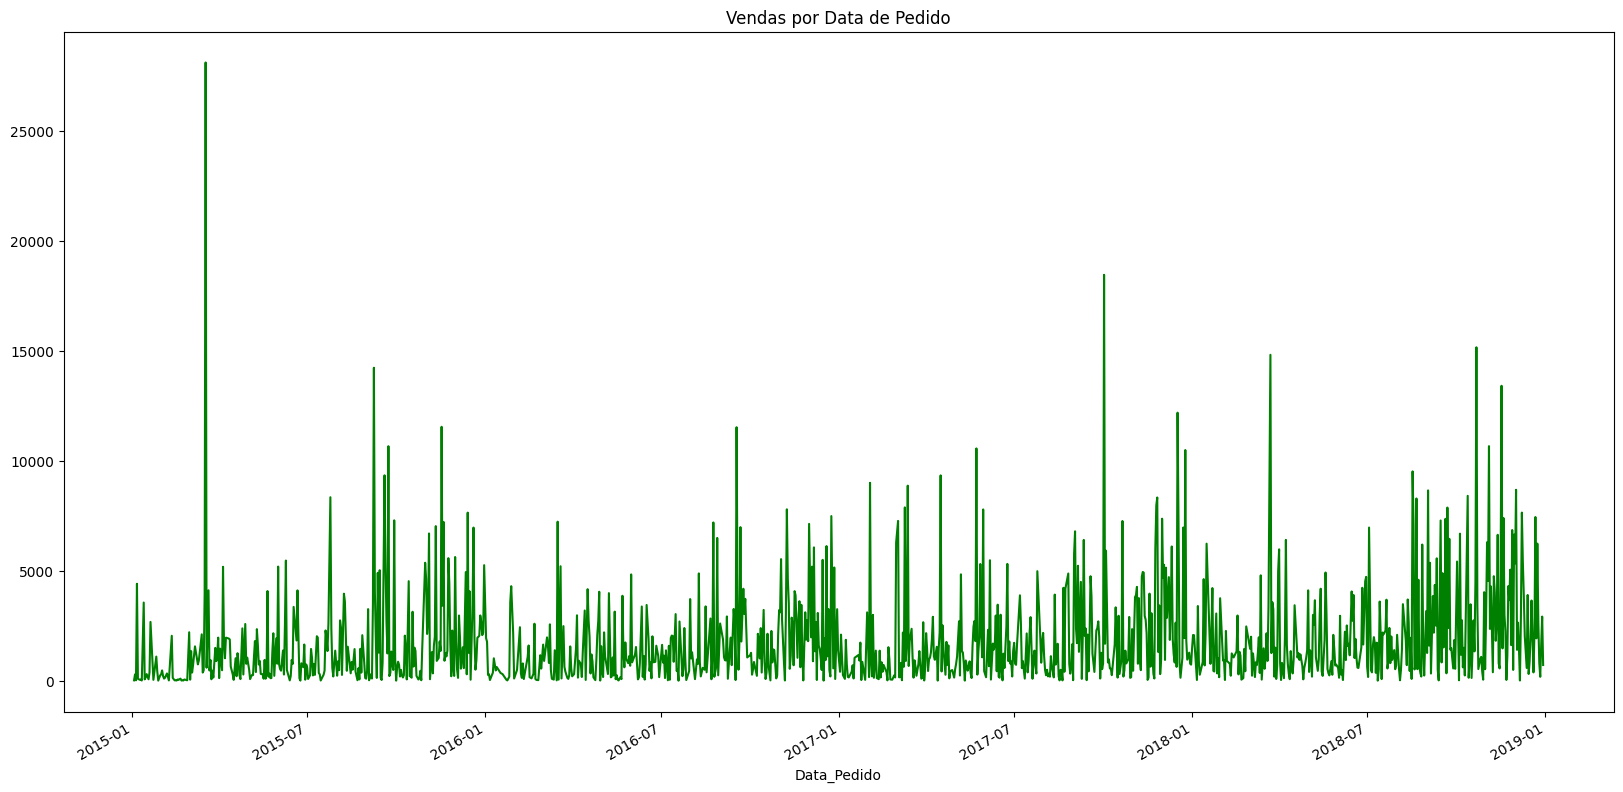

In [137]:
plt.figure(figsize = (20, 10))
pergunta2.plot(x = 'Data_Pedido', y = 'Valor_Venda', color = 'green')
plt.title('Vendas por Data de Pedido')
plt.show()

### 3 - Qual o Total de Vendas por Estado?

Demonstre o resultado através de um gráfico de barras.

In [138]:
dados_filtrados = dados.groupby('Estado')['Valor_Venda'].sum()

pergunta3 = dados_filtrados.sort_values(ascending=False).reset_index()

pergunta3.head()

,Estado,Valor_Venda
0,California,442927.0975
1,New York,304536.4010
2,Texas,163549.8602
3,Washington,133826.0060
4,Pennsylvania,114411.6800


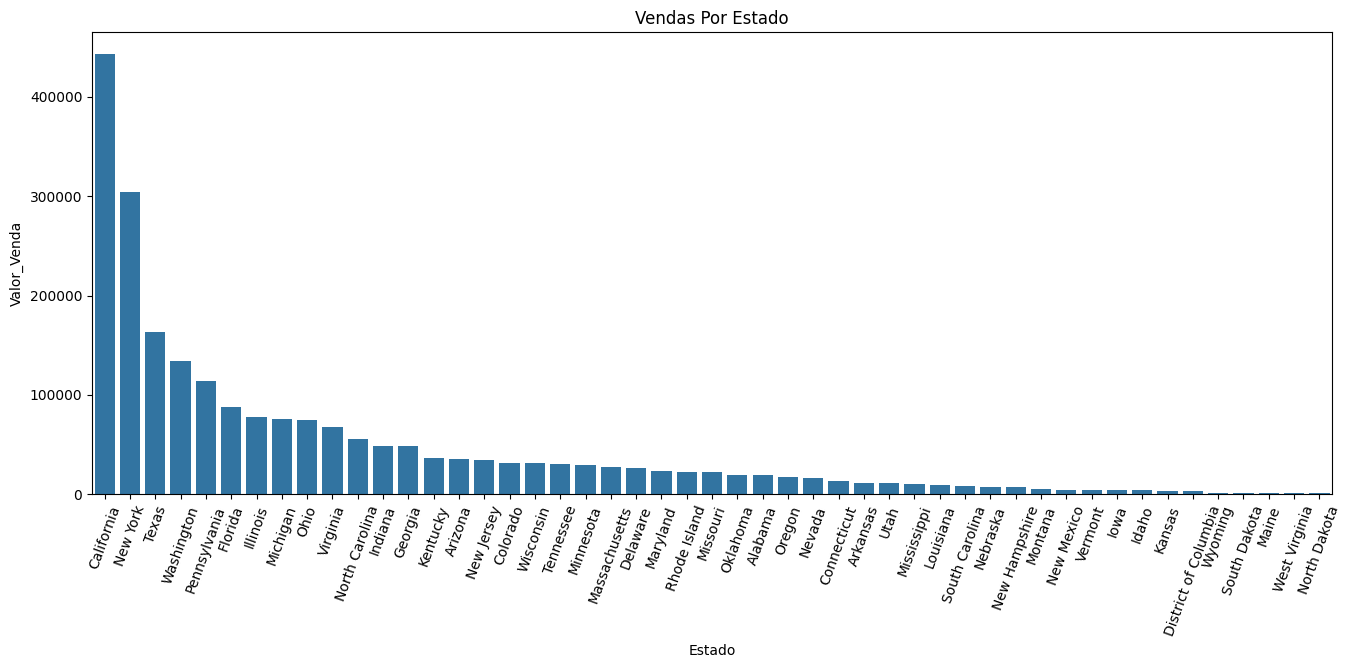

In [149]:
plt.figure(figsize = (16, 6))
sns.barplot(data = pergunta3, y = 'Valor_Venda', x = 'Estado').set(title = 'Vendas Por Estado')
plt.xticks(rotation = 70)
plt.show()

### 4 - Quais São as 10 Cidades com Maior Total de Vendas?

Demonstre o resultado através de um gráfico de barras.

In [140]:
dados_filtrados = dados.groupby('Cidade')['Valor_Venda'].sum()

pergunta4 = dados_filtrados.sort_values(ascending=False).reset_index().head(10)

pergunta4

,Cidade,Valor_Venda
0,New York City,251749.2190
1,Los Angeles,171654.6330
2,Seattle,114725.4780
3,San Francisco,107489.9520
4,Philadelphia,107197.8030
5,Houston,61590.1868
6,San Diego,47458.3790
7,Chicago,46974.3430
8,Jacksonville,44713.1830
9,Detroit,42446.9440


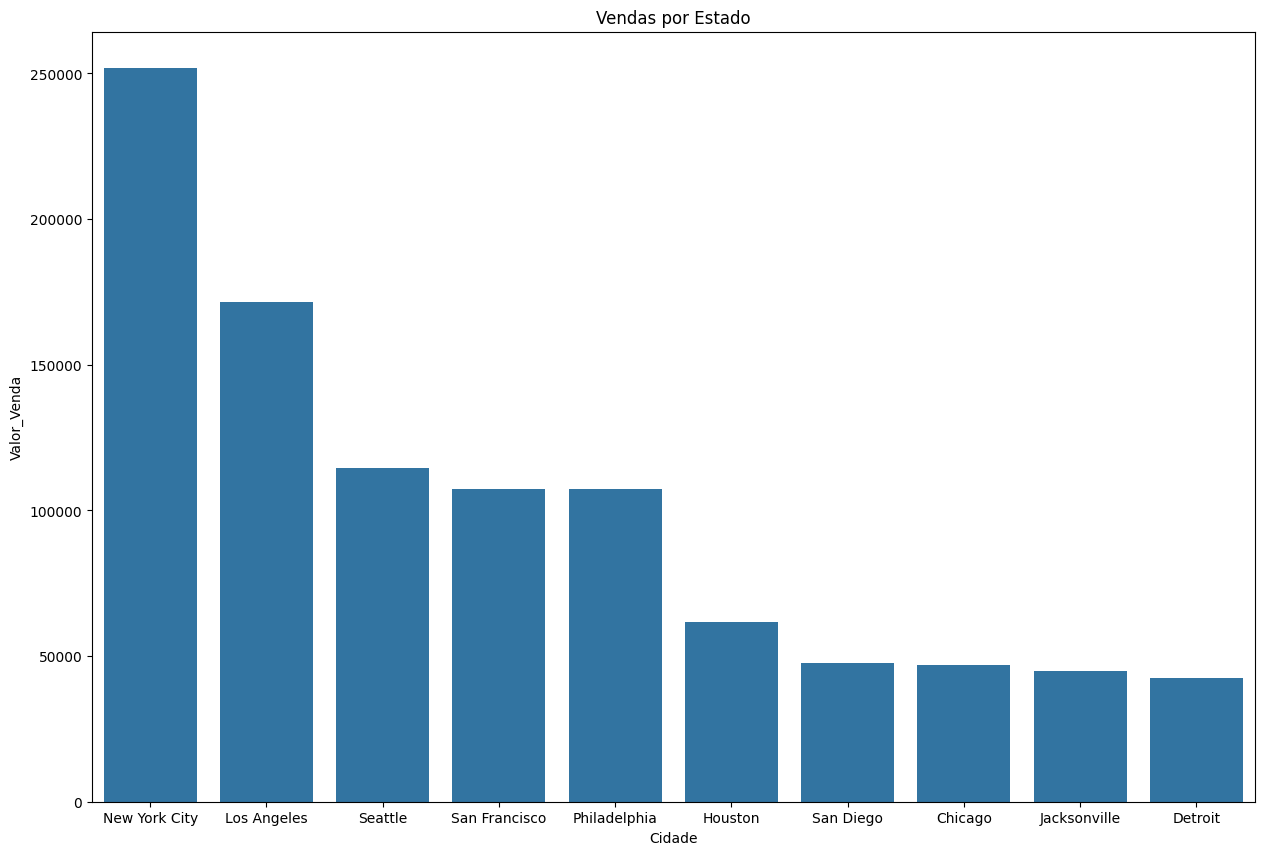

In [141]:
plt.figure(figsize = (15, 10))
sns.barplot(data = pergunta4, x = 'Cidade', y = 'Valor_Venda').set(title = 'Vendas por Estado')
plt.show()

### 5 - Qual Segmento Teve o Maior Total de Vendas?

Demonstre o resultado através de um gráfico de pizza.

In [142]:
dados_filtrados = dados.groupby('Segmento')['Valor_Venda'].sum()

pergunta5 = dados_filtrados.reset_index()

pergunta5

,Segmento,Valor_Venda
0,Consumer,1.133834e+06
1,Corporate,6.792322e+05
2,Home Office,4.224914e+05


In [143]:
pergunta5['Valor_Venda'] = pd.to_numeric(pergunta5['Valor_Venda'], errors='coerce')

pergunta5


,Segmento,Valor_Venda
0,Consumer,1.133834e+06
1,Corporate,6.792322e+05
2,Home Office,4.224914e+05


In [144]:
pergunta5.dtypes

Segmento        object
Valor_Venda    float64
dtype: object

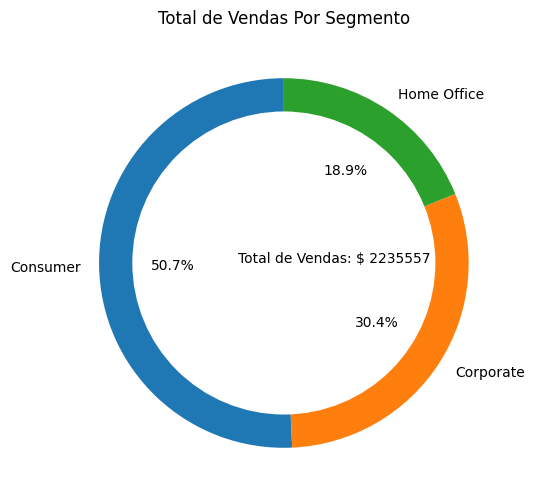

In [145]:
# Tamanho da figura
plt.figure(figsize = (16, 6))

# Gráfico de pizza
plt.pie(pergunta5['Valor_Venda'],
        labels = pergunta5['Segmento'],
        autopct = lambda pct: '{:.1f}%'.format(pct),
        startangle = 90)

# Limpa o círculo central
centre_circle = plt.Circle((0, 0), 0.82, fc = 'white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)

# Labels e anotações
plt.annotate(text = 'Total de Vendas: ' + '$ ' + str(int(sum(pergunta5['Valor_Venda']))), xy = (-0.25, 0))
plt.title('Total de Vendas Por Segmento')

# Exibindo o gráfico
plt.show()